# HW 2

In [1]:
import warnings; warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from datetime import datetime

In this HW, we will work with ```air_passenger.csv``` file. 
## Part 1: Data Prep 

### 1-1. File reading

Read the ```air_passenger.csv``` file using ```read_csv``` function in pandas package. Make sure index is a date/time object with a monthly frequency. Print out first five rows of the series. Print out the frequency of the index.  

In [ ]:

df = pd.read_csv('air_passenger.csv', parse_dates=['date'], index_col='date')

df = df.asfreq('M') if df.index.inferred_freq is None else df 

print(df.head())


            passengers
date                  
1949-01-31         112
1949-02-28         118
1949-03-31         132
1949-04-30         129
1949-05-31         121
Frequency: None


## 1-2. Data check and transformation
+ Is there any missing values in the series? If there are, drop those values and use front fill. 
+ Make a time series plot of $A_t$. 
+ Conduct a log transformation to $A_t$. Let's denote this ($log(A_t)$) as $X_t$.
+ Print out first five rows and final five rows of the series $X_t$. 

In [7]:
# Check for missing values
print("Missing values before handling:\n", df.isnull().sum())

# Drop or forward-fill missing values
df = df.ffill()  # Forward fill to handle missing data

print("Missing values after handling:\n", df.isnull().sum())

Missing values before handling:
 passengers    0
dtype: int64
Missing values after handling:
 passengers    0
dtype: int64


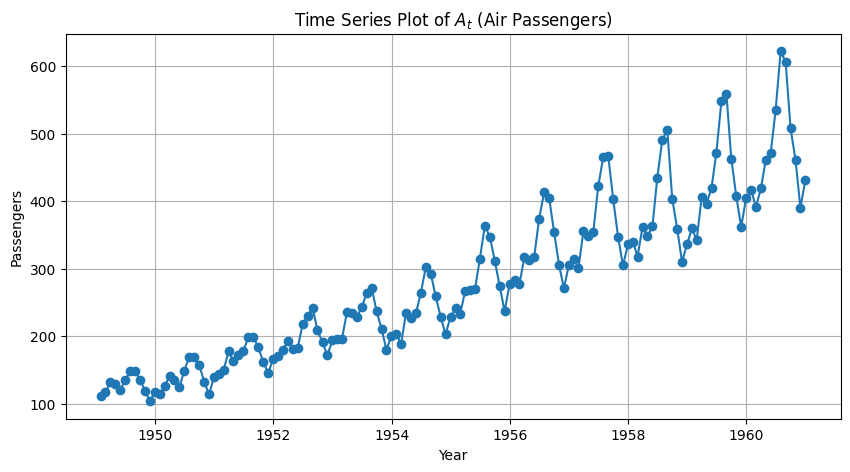

In [8]:
# Plot time series
plt.figure(figsize=(10,5))
plt.plot(df, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.title('Time Series Plot of $A_t$ (Air Passengers)')
plt.grid(True)
plt.show()

In [10]:
df['X_t'] = np.log(df['passengers'])

In [11]:
df['X_t'].head()

date
1949-01-31    4.718499
1949-02-28    4.770685
1949-03-31    4.882802
1949-04-30    4.859812
1949-05-31    4.795791
Name: X_t, dtype: float64

## 1-3. Visualization
ake following plots and show them:

+ a time series plot of $X_t$,
+ acf plot (with maximum lag of 10) of $X_t$,
+ a scatterplot between $X_t$ and $X_{t-1}$. (You may use ```plotting.lag_plot``` of ```pandas``` package.)
+ a scatterplot between $X_t$ and $X_{t-12}$. (You may use ```plotting.lag_plot``` of ```pandas``` package.)

Use subplots function of ```matplotlib``` package and show them in 2x2 panel. 

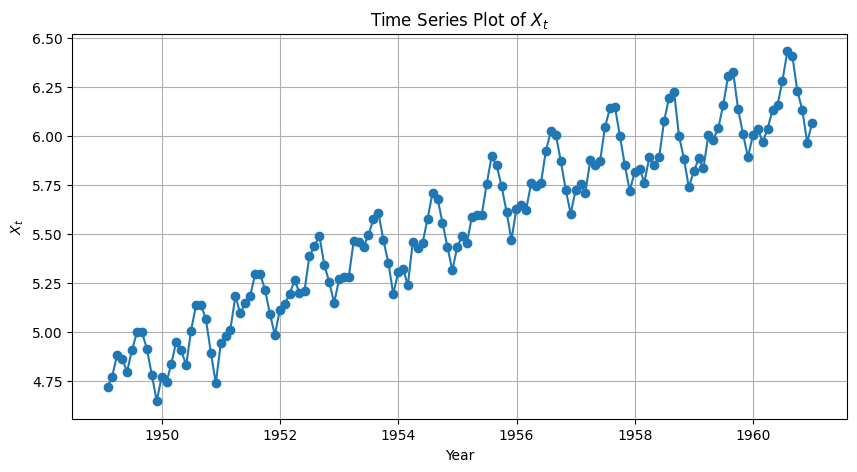

In [13]:

plt.figure(figsize=(10,5))
plt.plot(df['X_t'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('$X_t$')
plt.title('Time Series Plot of $X_t$')
plt.grid(True)
plt.show()


<Figure size 1000x500 with 0 Axes>

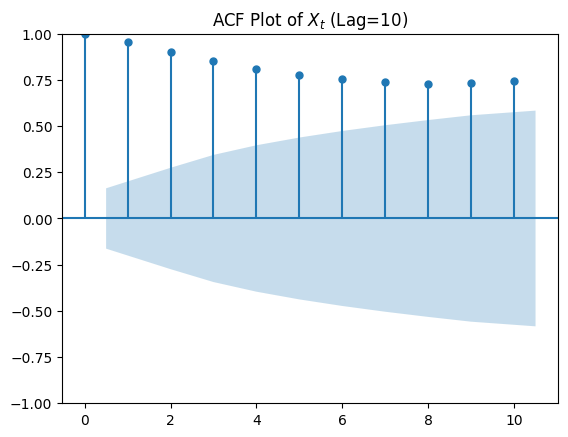

In [14]:
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(10,5))
plot_acf(df['X_t'], lags=10)
plt.title('ACF Plot of $X_t$ (Lag=10)')
plt.show()


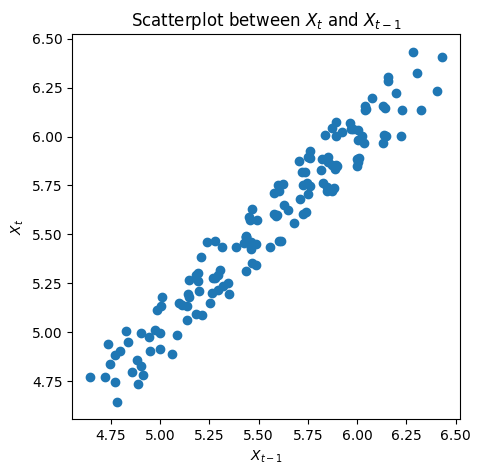

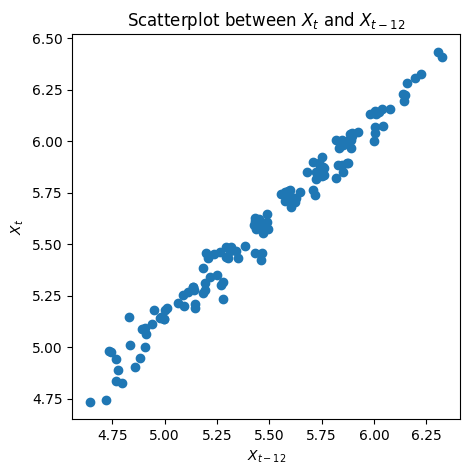

In [16]:
from pandas.plotting import lag_plot

# Scatterplot between X_t and X_{t-1}
plt.figure(figsize=(5,5))
lag_plot(df['X_t'], lag=1)
plt.xlabel('$X_{t-1}$')
plt.ylabel('$X_t$')
plt.title('Scatterplot between $X_t$ and $X_{t-1}$')
plt.show()

# Scatterplot between X_t and X_{t-12}
plt.figure(figsize=(5,5))
lag_plot(df['X_t'], lag=12)
plt.xlabel('$X_{t-12}$')
plt.ylabel('$X_t$')
plt.title('Scatterplot between $X_t$ and $X_{t-12}$')
plt.show()


# Part 2: Linear Regression
Run the following linear regression models to the data, and make a prediction for $X_t$ when $t=$ January of 1961.
+ ```mod1```: $X_t = \beta_0 + \beta_1 t + W_t$
+ ```mod2```: $X_t = \beta_0 + \beta_1 t + \beta_2 Feb_t + \dots + \beta_{12} Dec_t + W_t$, where $Feb_t, \dots, Dec_t$ are indicatator variables for respective months.
+ ```mod3```: $X_t = \beta_0 + \beta_1 t + \beta_2 X_{t-1}+ W_t$
+ ```mod4```: $X_t = \beta_0 + \beta_1 t + \beta_2 X_{t-12}+ W_t$

You need to show:
+ Summary of regression result of each model.
+ A time series plot of $X_t$ with fit of each model.
+ Residual plots for each model, and using thsi plot and the result of regression, argue whether the residual is approximately white noise or not.
+ Compare models using R-squared, adjusted R-squared, AIC, and BIC. 
+ Prediction at $t=$ January of 1961.

In [19]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Create time index
df['t'] = np.arange(1, len(df) + 1)

# Create month indicator variables (excluding January as the reference)
df['month'] = df.index.month
df = pd.get_dummies(df, columns=['month'], drop_first=True)

# Create lag features
df['X_t_1'] = df['X_t'].shift(1)   # X_{t-1}
df['X_t_12'] = df['X_t'].shift(12) # X_{t-12}

# Drop NaN rows created by lagging
df = df.dropna()


In [20]:
# Define function to fit model
def fit_model(formula):
    return sm.OLS.from_formula(formula, data=df).fit()

# Model 1: Linear Trend Model
mod1 = fit_model('X_t ~ t')

# Model 2: Linear Trend + Monthly Seasonality
mod2 = fit_model('X_t ~ t + ' + ' + '.join([f'month_{i}' for i in range(2, 13)]))

# Model 3: Linear Trend + Lag-1 Autoregression
mod3 = fit_model('X_t ~ t + X_t_1')

# Model 4: Linear Trend + Lag-12 (Yearly) Autoregression
mod4 = fit_model('X_t ~ t + X_t_12')

# Print summary of each model
print("Model 1 Summary:\n", mod1.summary())
print("\nModel 2 Summary:\n", mod2.summary())
print("\nModel 3 Summary:\n", mod3.summary())
print("\nModel 4 Summary:\n", mod4.summary())


Model 1 Summary:
                             OLS Regression Results                            
Dep. Variable:                    X_t   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     443.7
Date:                Wed, 26 Feb 2025   Prob (F-statistic):           1.12e-39
Time:                        02:14:53   Log-Likelihood:                 59.295
No. Observations:                 108   AIC:                            -114.6
Df Residuals:                     106   BIC:                            -109.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.1244      0.032  

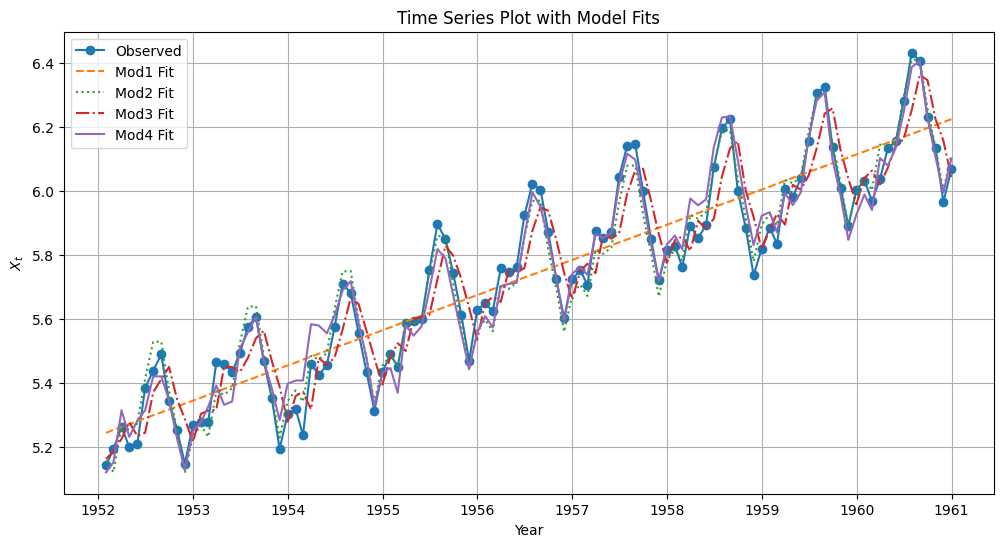

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['X_t'], label="Observed", marker='o', linestyle='-')
plt.plot(df.index, mod1.fittedvalues, label="Mod1 Fit", linestyle='dashed')
plt.plot(df.index, mod2.fittedvalues, label="Mod2 Fit", linestyle='dotted')
plt.plot(df.index, mod3.fittedvalues, label="Mod3 Fit", linestyle='dashdot')
plt.plot(df.index, mod4.fittedvalues, label="Mod4 Fit", linestyle='solid')

plt.xlabel("Year")
plt.ylabel("$X_t$")
plt.title("Time Series Plot with Model Fits")
plt.legend()
plt.grid(True)
plt.show()


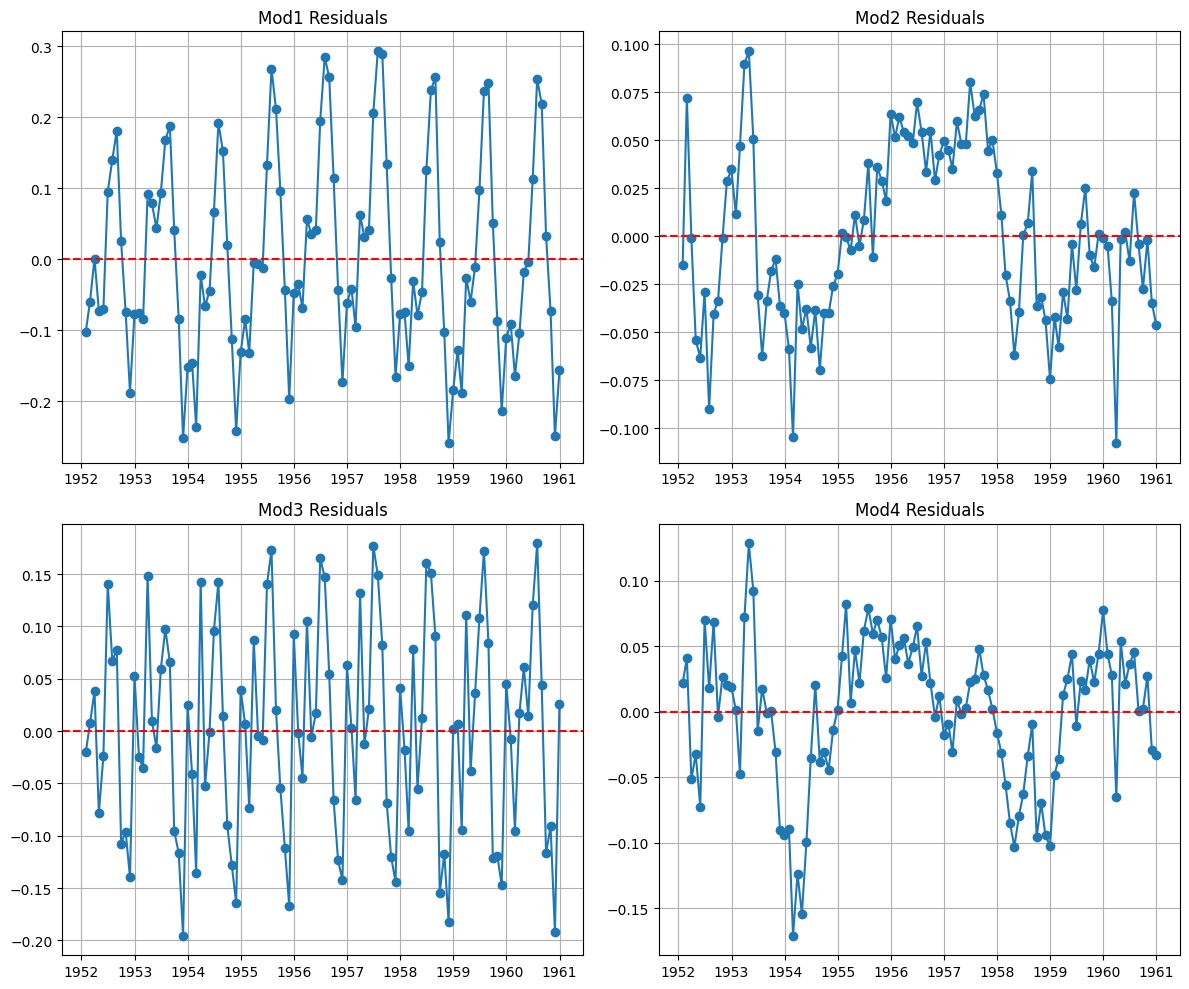

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

models = [mod1, mod2, mod3, mod4]
titles = ["Mod1 Residuals", "Mod2 Residuals", "Mod3 Residuals", "Mod4 Residuals"]

for i, (mod, title) in enumerate(zip(models, titles)):
    ax = axes[i//2, i%2]
    ax.plot(df.index, mod.resid, marker='o', linestyle='-')
    ax.axhline(0, color='r', linestyle='--')
    ax.set_title(title)
    ax.grid(True)

plt.tight_layout()
plt.show()


In [25]:
comparison = pd.DataFrame({
    "Model": ["Mod1", "Mod2", "Mod3", "Mod4"],
    "R-squared": [mod1.rsquared, mod2.rsquared, mod3.rsquared, mod4.rsquared],
    "Adj. R-squared": [mod1.rsquared_adj, mod2.rsquared_adj, mod3.rsquared_adj, mod4.rsquared_adj],
    "AIC": [mod1.aic, mod2.aic, mod3.aic, mod4.aic],
    "BIC": [mod1.bic, mod2.bic, mod3.bic, mod4.bic]
})

from IPython.display import display

display(comparison)


,Model,R-squared,Adj. R-squared,AIC,BIC
0,Mod1,0.807156,0.805336,-114.589963,-109.225701
1,Mod2,0.980498,0.978035,-340.058688,-305.190982
2,Mod3,0.903664,0.901829,-187.545894,-179.499501
3,Mod4,0.969715,0.969139,-312.524569,-304.478176


In [26]:
# Define prediction time index
t_pred = df['t'].max() + 1
df_pred = pd.DataFrame({'t': [t_pred], 'X_t_1': [df['X_t'].iloc[-1]], 'X_t_12': [df['X_t'].iloc[-12]]})

# Add month dummy variables dynamically based on existing columns (January is the reference)
for col in df.columns:
    if col.startswith('month_'):
        df_pred[col] = 0  # Set all month dummies to 0 (since January is reference)

# Ensure column consistency (order) with the original dataframe
df_pred = df_pred.reindex(columns=df.columns, fill_value=0)

# Make predictions
pred1 = mod1.predict(df_pred)
pred2 = mod2.predict(df_pred)
pred3 = mod3.predict(df_pred)
pred4 = mod4.predict(df_pred)

# Print predictions
print("Predictions for January 1961:")
print(f"Mod1: {pred1.iloc[0]:.4f}")
print(f"Mod2: {pred2.iloc[0]:.4f}")
print(f"Mod3: {pred3.iloc[0]:.4f}")
print(f"Mod4: {pred4.iloc[0]:.4f}")

Predictions for January 1961:
Mod1: 6.2340
Mod2: 6.1486
Mod3: 6.1173
Mod4: 6.1295
